                                    PREDICTIVE ANALYSIS ON LAPTOP PRICE
1. The target of the project is to study dataset in detail with python libraries and draw conclusion of price increment in laptops from existing price.
2. It is a Kaggle dataset that provides comprehensive collection of laptop attributes and features.
3. The analysis starts with importing data to Jupyter Notebook and a preprocessing followed by an EDA.
4. To build a model for linear regression, all unwanted columns are removed and an attribute is chosen based on the graph for the prediction.
5. The data is then splitted into training and test sets and linear regression analysis is performed.
6. The result is drawn and a regression line is plotted that says the laptop price will increase linearly within price range 10 to 11 in Y-axis and weight range 1.0 - 3.5 in X-axis. The graph shows a small break in the line that again rises linearly.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
import statsmodels.api as sm
%matplotlib inline

In [3]:
laptop_data = pd.read_csv("C:/Users/USER/Desktop/Datasets/laptop_data_cleaned.csv")
laptop_data.head(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,4,2.10,9.967026,0,0,100.454670,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,16,2.04,11.644108,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,11.030615,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,11.285443,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,10.621952,0,1,157.350512,Intel Core i5,0,256,Intel,Windows


In [4]:
laptop_data.shape

(1273, 13)

In [5]:
laptop_data.tail(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1263,Dell,Notebook,2,2.20,9.913097,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows
1264,Lenovo,Notebook,8,2.60,10.776844,0,1,141.211998,Intel Core i7,1000,0,Nvidia,Windows
1265,HP,Notebook,6,2.04,10.285461,0,0,141.211998,AMD Processor,0,0,AMD,Windows
1266,Dell,Notebook,8,2.30,10.667632,0,0,100.454670,Intel Core i7,1000,0,AMD,Others
1267,HP,Netbook,2,1.17,9.317895,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [5]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [6]:
laptop_data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [7]:
laptop_data.isna().any()

Company        False
TypeName       False
Ram            False
Weight         False
Price          False
TouchScreen    False
Ips            False
Ppi            False
Cpu_brand      False
HDD            False
SSD            False
Gpu_brand      False
Os             False
dtype: bool

C:\Users\USER\AppData\Local\Temp\ipykernel_14708\416580847.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics = laptop_data.corr()


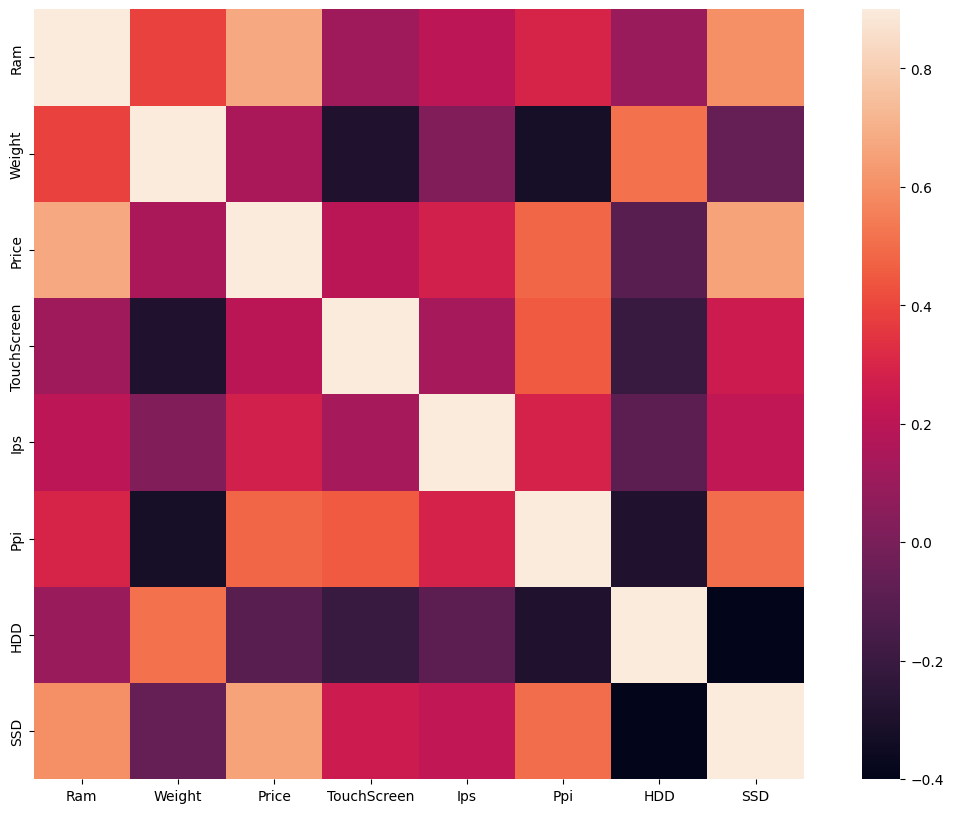

                  Ram    Weight     Price  TouchScreen       Ips       Ppi  \
Ram          1.000000  0.389134  0.680519     0.113316  0.202809  0.294927   
Weight       0.389134  1.000000  0.151386    -0.292288  0.023966 -0.319499   
Price        0.680519  0.151386  1.000000     0.194289  0.279240  0.480687   
TouchScreen  0.113316 -0.292288  0.194289     1.000000  0.136973  0.452107   
Ips          0.202809  0.023966  0.279240     0.136973  1.000000  0.288833   
Ppi          0.294927 -0.319499  0.480687     0.452107  0.288833  1.000000   
HDD          0.097340  0.510876 -0.097361    -0.205105 -0.090411 -0.290774   
SSD          0.599552 -0.056985  0.658808     0.252142  0.215197  0.499899   

                  HDD       SSD  
Ram          0.097340  0.599552  
Weight       0.510876 -0.056985  
Price       -0.097361  0.658808  
TouchScreen -0.205105  0.252142  
Ips         -0.090411  0.215197  
Ppi         -0.290774  0.499899  
HDD          1.000000 -0.400625  
SSD         -0.400625  1.

In [8]:
# Understanding correlation between the labels
correlation_metrics = laptop_data.corr()
fig = plt.figure(figsize=(15, 10))
sns.heatmap(correlation_metrics, vmax=0.9, square=True)
plt.show()
print(correlation_metrics)

In [9]:
# dropping unwanted columns 
laptop_data.drop(['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], axis = 1, inplace=True)

In [10]:
# after removing unwanted columns for prediction
laptop_data.columns

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD'], dtype='object')

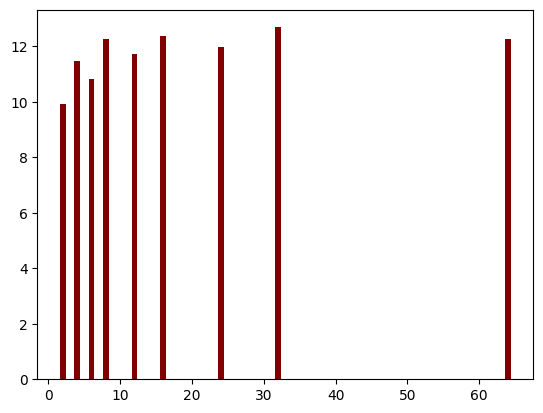

In [11]:
a = laptop_data['Ram']
b = laptop_data['Price']
plt.bar(a,b, color='maroon')
plt.show()

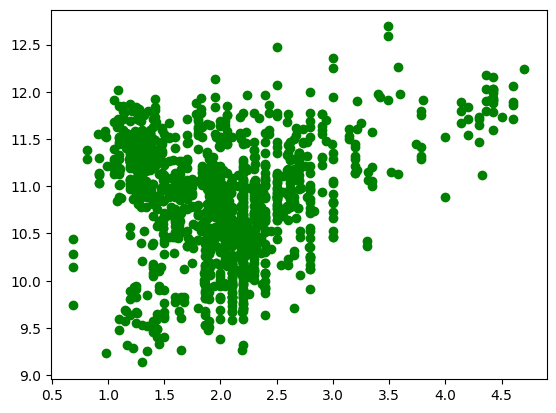

In [12]:
a = laptop_data['Weight']
b = laptop_data['Price']
plt.scatter(a,b, color='g')
plt.show()

In [13]:
# Using scikit_learn to split data into training and testing sets
X = np.array(laptop_data[['Weight']]).reshape(-1,1)
Y = np.array(laptop_data['Price']).reshape(-1,1)
Y.shape

(1273, 1)

In [14]:
# splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=100)
xtrain

array([[2.2 ],
       [2.06],
       [1.48],
       ...,
       [2.06],
       [2.5 ],
       [1.37]])

In [15]:
linear = LinearRegression()
linear.fit(xtrain, ytrain)
print(linear.score(xtest, ytest))

0.015596831450721882


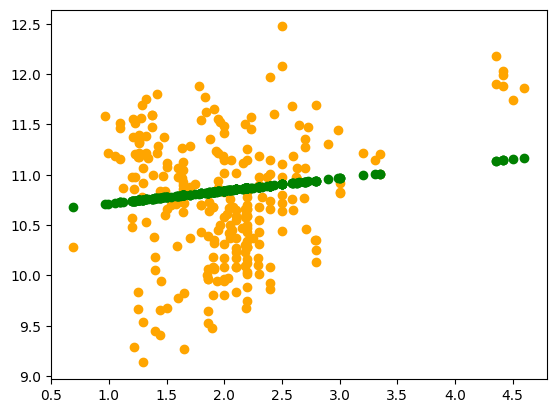

In [16]:
y_predict = linear.predict(xtest)
plt.scatter(xtest, ytest, color='orange')
plt.scatter(xtest, y_predict, color='green')
# data scatter of predicted values

In [17]:
# regression result
x = sm.add_constant(xtest)
results = sm.OLS(y_predict, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.373e+29
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:20:20   Log-Likelihood:                 8302.1
No. Observations:                 255   AIC:                        -1.660e+04
Df Residuals:                     253   BIC:                        -1.659e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5877   3.65e-16    2.9e+16      0.000      10.588      10.588
x1             0.1265   1.73e-16   7.33e+14      0.000       0.126       0.126
==============================================================================
Omnibus:                       16.127   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.223
Skew:                           0.450   Prob(JB):                     1.49e-05
Kurtosis:                       4.132   Cond. No.                         8.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[[10.76227 ]
 [10.8407  ]
 [10.933045]
 [10.834375]
 [10.82046 ]
 [10.965935]
 [10.7395  ]
 [10.92925 ]
 [10.796425]
 [11.011475]
 [10.866   ]
 [10.761005]
 [10.75468 ]
 [10.920395]
 [10.74709 ]
 [10.87865 ]
 [10.809075]
 [10.77745 ]
 [10.829315]
 [10.86347 ]
 [10.8913  ]
 [10.75468 ]
 [10.8407  ]
 [10.74709 ]
 [11.006415]
 [10.866   ]
 [10.86094 ]
 [10.776185]
 [10.824255]
 [10.82299 ]
 [10.930515]
 [10.82805 ]
 [10.8407  ]
 [10.80275 ]
 [10.79516 ]
 [10.72685 ]
 [10.72685 ]
 [10.763535]
 [10.750885]
 [10.84576 ]
 [10.8407  ]
 [11.14683 ]
 [10.74203 ]
 [10.77745 ]
 [10.872325]
 [10.82552 ]
 [10.75468 ]
 [10.776185]
 [10.85335 ]
 [10.7901  ]
 [10.85335 ]
 [10.866   ]
 [10.877385]
 [10.768595]
 [10.74203 ]
 [10.85335 ]
 [10.85335 ]
 [10.82299 ]
 [10.9672  ]
 [10.761005]
 [10.866   ]
 [10.740765]
 [10.866   ]
 [10.87865 ]
 [10.75215 ]
 [10.866   ]
 [10.8154  ]
 [10.864735]
 [10.76733 ]
 [10.866   ]
 [10.8913  ]
 [10.77745 ]
 [10.7901  ]
 [10.9419  ]
 [10.74709 ]
 [10.75721 ]
 [10.92925 ]

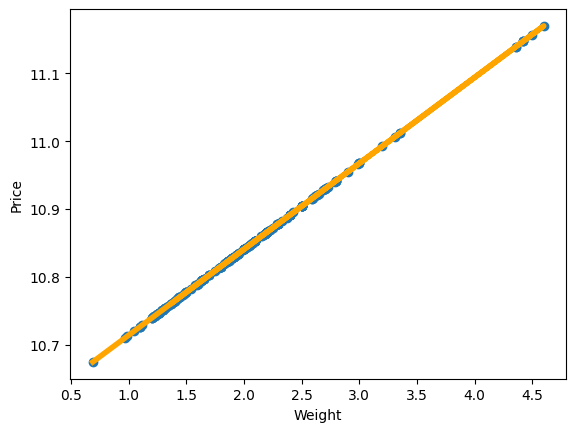

In [18]:
plt.scatter(xtest,y_predict)
yhat = 0.1265 * xtest + 10.5877
print(yhat)
fig = plt.plot(xtest, yhat, lw = 4, c='orange', label='Rregression line')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

From the linear regression predictive analysis, it is concluded that the laptop price will be likely to increase linearly within price range 10 - 11 and weight range 1 - 3.5.
However, a small break in the line shows that the price will not rise within weight range from 3.5 - 4.3 but it may rise again from  weight range 4.3 and beyond. 